# Domain analysis

In this notebook I analyze the clustered data for temperature, relative humidity and surface pressure.

I want to measure the relative shift of the data distribution for each domain.

In [1]:
import os
import glob
import xarray as xr
import dask
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/9_6_*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds_9_6 = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879


In [3]:
t2m_9_6 = ds_9_6["T_2M"].load()  # Load into memory for computations

# Compute statistics
mean_temp = t2m_9_6.mean().item()  # Convert to scalar
std_temp = t2m_9_6.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m_9_6.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()

# Close dataset to free resources
ds.close()

# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")

KeyboardInterrupt: 

In [15]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/1"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/5_6_*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds_5_6 = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879


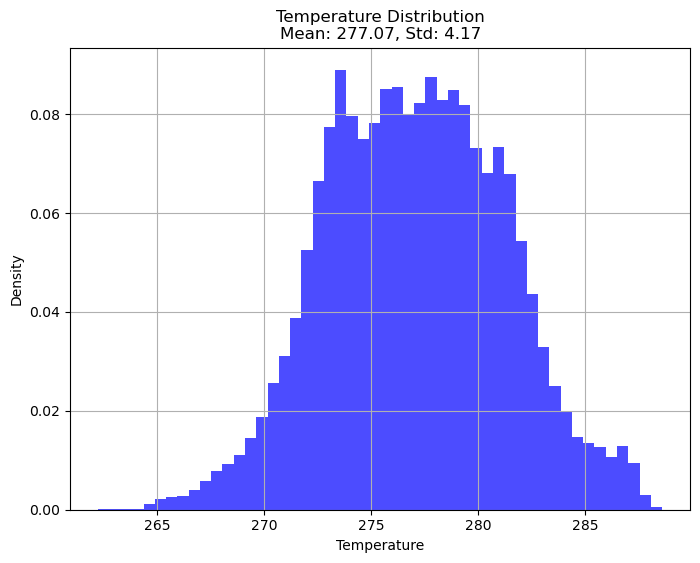

Mean Temperature: 277.07
Standard Deviation: 4.17


In [ ]:
t2m_5_6 = ds["T_2M"].load()  # Load into memory for computations

# Compute statistics
mean_temp = t2m_5_6.mean().item()  # Convert to scalar
std_temp = t2m_5_6.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m_5_6.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()

# Close dataset to free resources
ds.close()

# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")

In [8]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/2"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/6_5_*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds_6_5 = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879


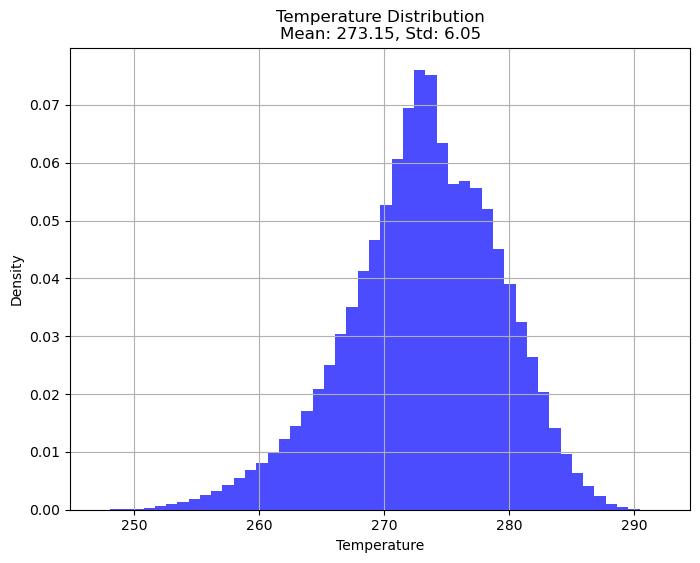

Mean Temperature: 273.15
Standard Deviation: 6.05


In [14]:
t2m_6_5 = ds_6_5["T_2M"].load()  # Load into memory for computations

ds_6_5.close()


# Compute statistics
mean_temp = t2m_6_5.mean().item()  # Convert to scalar
std_temp = t2m_6_5.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m_6_5.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()


# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")

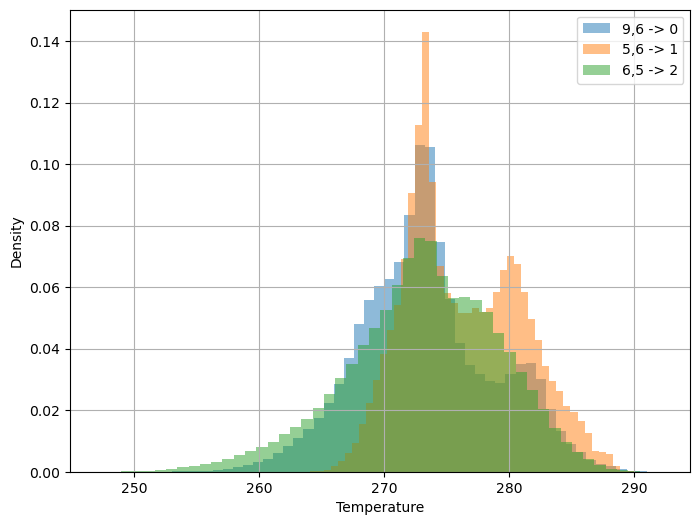

In [16]:
t2m_6_5 = ds_6_5["T_2M"].load()
ds_6_5.close()
t2m_9_6 = ds_9_6["T_2M"].load()
ds_9_6.close()
t2m_5_6 = ds_5_6["T_2M"].load()
ds_5_6.close()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m_9_6.values.flatten(), bins=50, density=True, alpha=0.5, label="9,6 -> 0")
plt.hist(t2m_5_6.values.flatten(), bins=50, density=True, alpha=0.5, label="5,6 -> 1")
plt.hist(t2m_6_5.values.flatten(), bins=50, density=True, alpha=0.5, label="6,5 -> 2")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()